In [43]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# PART ONE: 1
df = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
df.describe()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


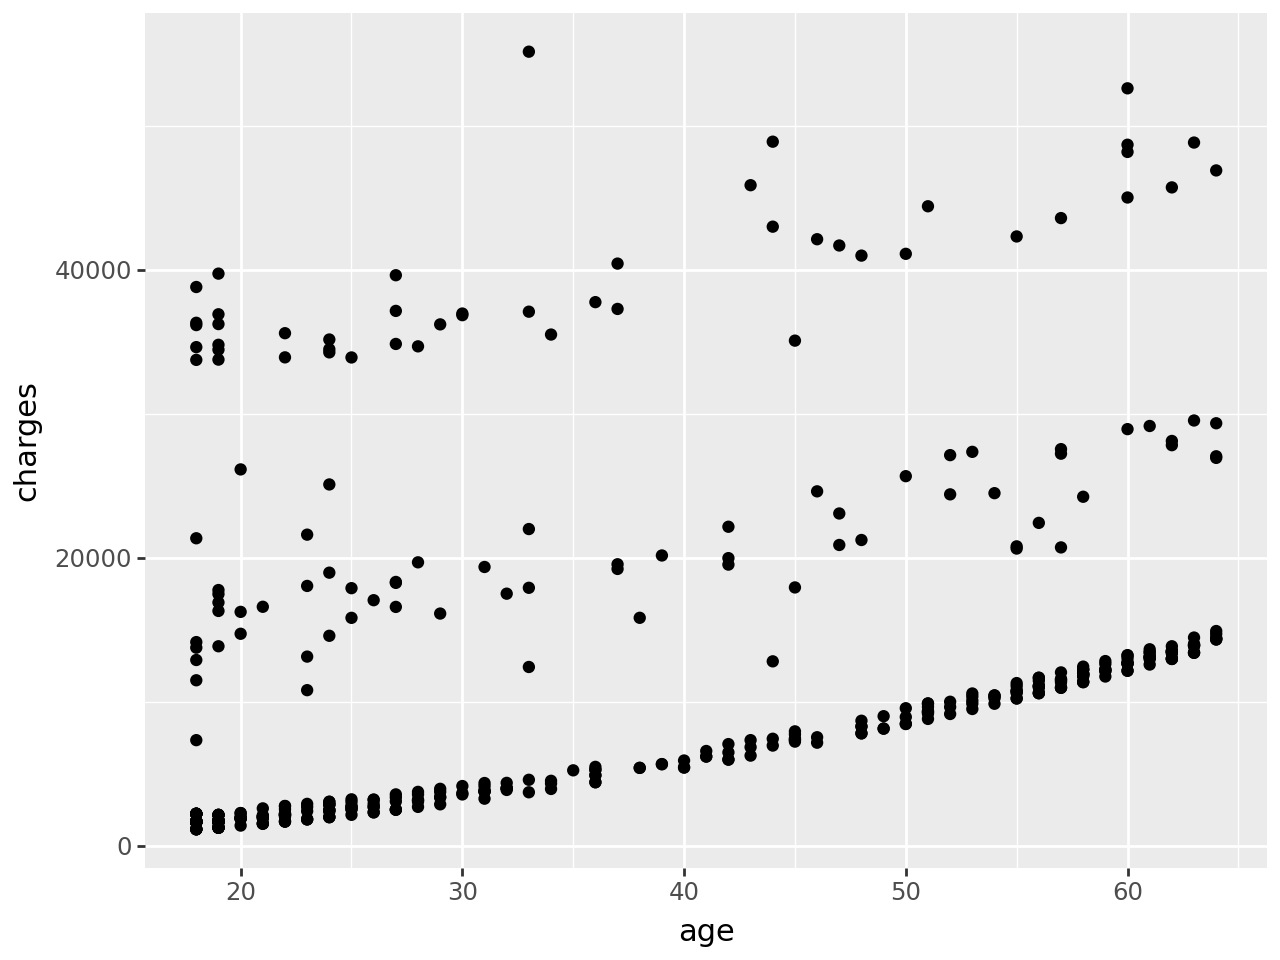

In [18]:
# PART ONE: 3.1
(ggplot(df, aes(x = "age", y = "charges")) + geom_point())

There seems to be three categories other than age that influences charges. In general, as age increases, charges increase.

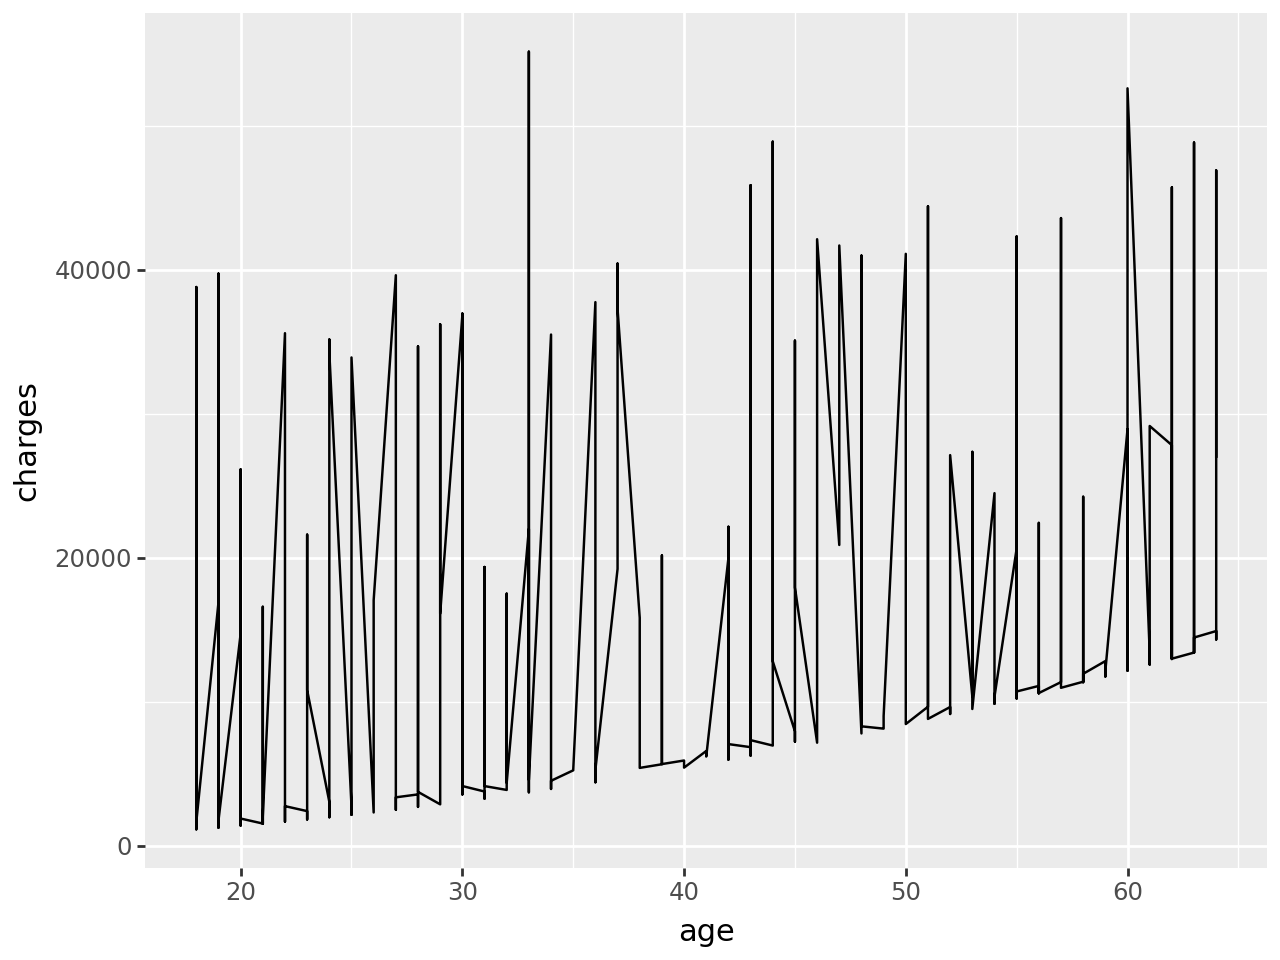

In [23]:
# PART ONE: 3.2
(ggplot(df, aes(x = "age", y = "charges")) + geom_line())

This line plot is less ideal than the scatterplot. It shows that charges fluctuate up and down repeatedly over age.

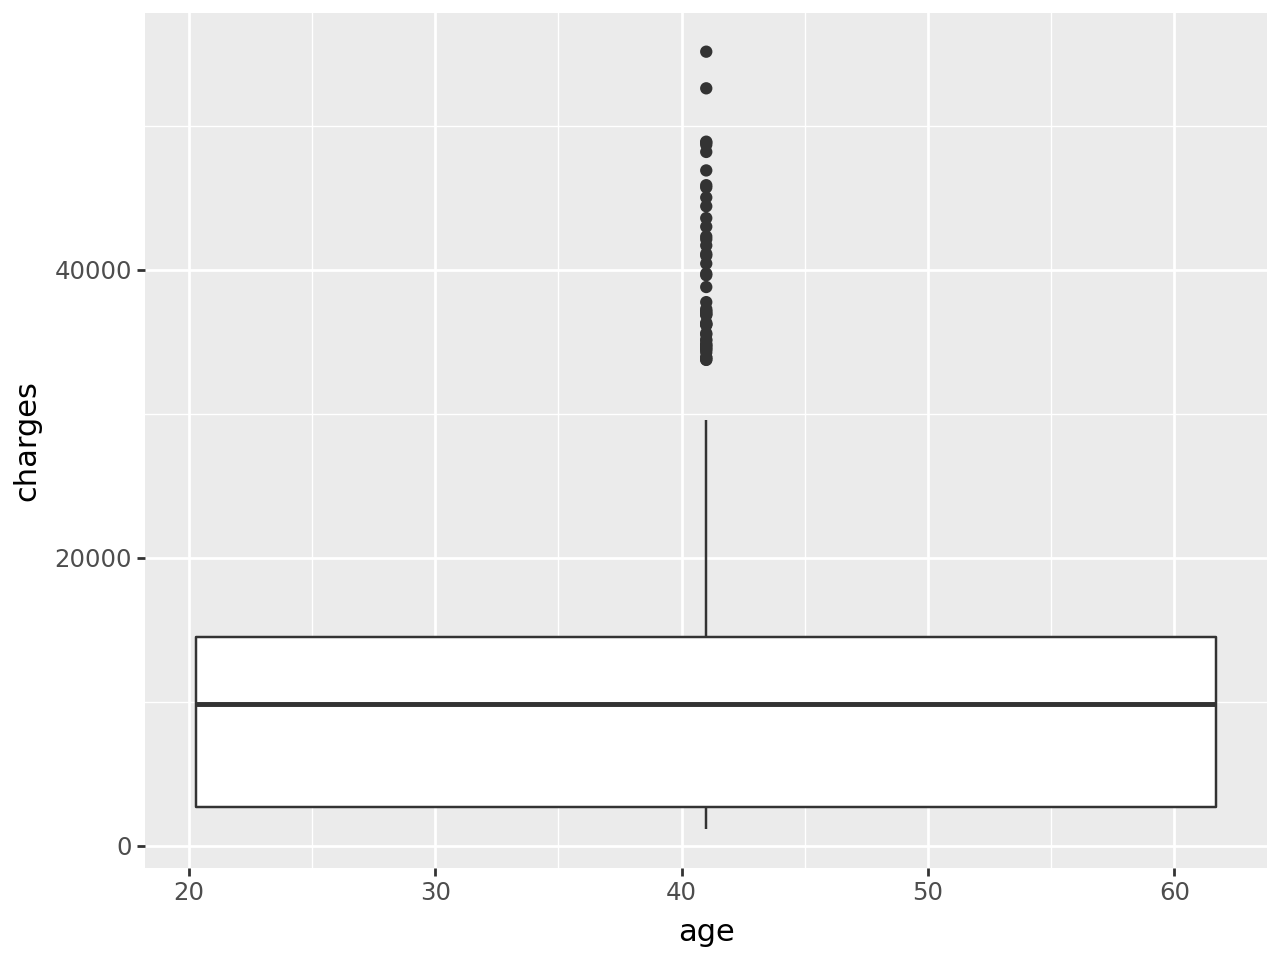

In [21]:
# PART ONE: 3.3
(ggplot(df, aes(x = "age", y = "charges")) + geom_boxplot())

This boxplot is the least ideal, but it shows that most charges are between 5000-15000ish with many outliers.

In [31]:
# PART TWO: 1
X_train = df[["age"]]
y_train = df["charges"]
model = LinearRegression()
model.fit(X=X_train,y=y_train)
y_train_ = model.predict(X=X_train)
print(mean_squared_error(y_train, y_train_))
print(r2_score(y_train, y_train_))

126739267.91026388
0.09938105452062707


In [33]:
# PART TWO: 2
X_train = df[["age", "sex"]]
y_train = df["charges"]
X_train = pd.get_dummies(X_train, columns=["sex"], drop_first=True)
model = LinearRegression()
model.fit(X=X_train,y=y_train)
y_train_ = model.predict(X=X_train)
print(mean_squared_error(y_train, y_train_))
print(r2_score(y_train, y_train_))

126633939.67937087
0.10012952499706396


In [34]:
# PART TWO: 3
X_train = df[["age", "smoker"]]
y_train = df["charges"]
X_train = pd.get_dummies(X_train, columns=["smoker"], drop_first=True)
model = LinearRegression()
model.fit(X=X_train,y=y_train)
y_train_ = model.predict(X=X_train)
print(mean_squared_error(y_train, y_train_))
print(r2_score(y_train, y_train_))

33719831.46524373
0.7603842948069404


### **PART TWO: 4**

Q3 is the better model.

* Q3 MSE = 33719831 < Q2 MSE = 126633940
* Q3 R2 = 0.76 > Q2 R2 = 0.10

In [36]:
# PART THREE: 1
X_train = df[["age", "bmi"]]
y_train = df["charges"]
model = LinearRegression()
model.fit(X=X_train,y=y_train)
y_train_ = model.predict(X=X_train)
print(mean_squared_error(y_train, y_train_))
print(r2_score(y_train, y_train_))

123792439.58129103
0.12032144234129338


The model in 3.1 is slightly better than 2.1. 3.1 has a lower MSE and higher R2.

In [ ]:
# PART THREE: 2
X_train, X_test, y_train, y_test = train_test_split(df.drop(['charges'], axis=1), df['charges'], test_size=0.25)

df["age2"] = df["age"] ** 2
df["age4"] = df["age"] ** 4
df["age5"] = df["age"] ** 5

models = {
    "Model 1": ["age"],
    "Model 2": ["age", 'age2'],
    "Model 3": ["age", 'age2', 'age4'],
    "Model 4": ["age", 'age2', 'age4', 'age5']
}

rows = []
for name, Xcols in models.items():
    X = X_train[Xcols]
    model = LinearRegression().fit(X, y_train)
    y_test_ = model.predict(y_test[Xcols])
    X_test[f"{name}_predict"] = y_test_
    test_mse = mean_squared_error(y_test, y_test_)
    test_r2 = r2_score(y_test, y_test_)
    rows.append({"Model": name, "Test MSE": test_mse, "Test R2": test_r2})

test_error = pd.DataFrame(rows)
test_error